<a href="https://colab.research.google.com/github/Drkareemkamal/LGMVIP_DataScience_Task10/blob/main/Facial_Recognition_mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

# Import Liberaries

In [143]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import seaborn as sns
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## load our dataset from Kaggel using `opendatasets`

In [2]:
od.download('https://www.kaggle.com/datasets/msambare/fer2013')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drkarimkamal
Your Kaggle Key: ··········


100%|██████████| 60.3M/60.3M [00:00<00:00, 108MB/s] 


## Walk through directory using `os.walk` method

In [4]:
path = '/content/fer2013/train'
total = {}
directory = os.listdir(path)
for dirpath , dirname , filename in os.walk(path):
  print(f'there are {dirname} in {dirpath} directories and {len(filename)}')


there are ['fear', 'neutral', 'surprise', 'disgust', 'sad', 'happy', 'angry'] in /content/fer2013/train directories and 0
there are [] in /content/fer2013/train/fear directories and 4097
there are [] in /content/fer2013/train/neutral directories and 4965
there are [] in /content/fer2013/train/surprise directories and 3171
there are [] in /content/fer2013/train/disgust directories and 436
there are [] in /content/fer2013/train/sad directories and 4830
there are [] in /content/fer2013/train/happy directories and 7215
there are [] in /content/fer2013/train/angry directories and 3995


## Visualize our datasets

In [19]:
train_count = {}
test_count = {}

train_path = '/content/fer2013/train'
train_directory = os.listdir(train_path)
test_path = '/content/fer2013/test'
test_directory = os.listdir(test_path)
for subdir in train_directory:
  #print(i,end='')
  sub = train_path + '/' + subdir
  train_count[subdir] = len(os.listdir(sub))

for sub_test_dir in test_directory :
  sub_test = test_path + '/' + sub_test_dir
  test_count[sub_test_dir] = len(os.listdir(sub_test))
train_count , test_count

train_df = pd.DataFrame(train_count,index = ['Total count'])
test_df = pd.DataFrame(test_count,index=['Total count'])

train_df , test_df

(             fear  neutral  surprise  disgust   sad  happy  angry
 Total count  4097     4965      3171      436  4830   7215   3995,
              fear  neutral  surprise  disgust   sad  happy  angry
 Total count  1024     1233       831      111  1247   1774    958)

In [20]:
train_df = train_df.transpose().sort_values('Total count', ascending=False)
test_df = test_df.transpose().sort_values('Total count',ascending=False)

Text(0.5, 1.0, 'total images in each label in test dataset')

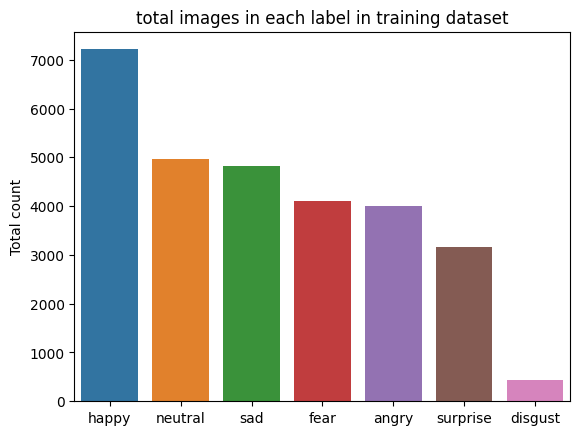

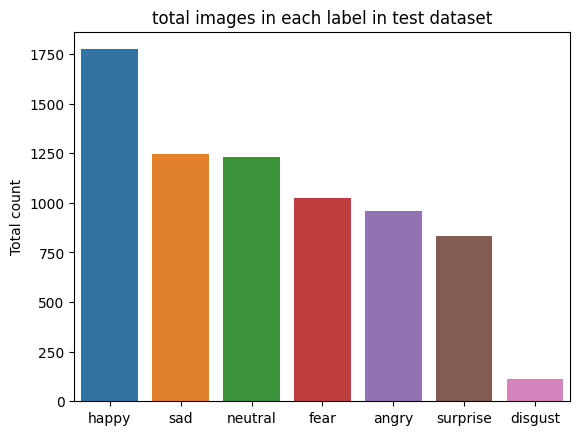

In [23]:
sns.barplot(x=train_df.index, y='Total count',data=train_df)
plt.title('total images in each label in training dataset')
plt.figure()
sns.barplot(x=test_df.index, y='Total count',data=test_df)
plt.title('total images in each label in test dataset')

In [126]:
RANDOM_EMOTION  = ['angry', 'disgust', 'fear','happy','neutral','sad','surprise']

In [140]:
def view_random_image(target_dir):
  plt.figure(figsize=(18,20))
  for i in range(25):

    ax = plt.subplot(5,5,i+1)

    target_class = random.choice(RANDOM_EMOTION)
    target_folder = target_dir+'/'+ target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    img = tf.io.read_file(target_folder + "/" + random_image[0])
    img = tf.image.decode_image(img,channels=3)
    img = tf.image.resize(img,size=[48,48])
    img = tf.cast(img,tf.float32)
    plt.imshow(np.array(img,np.int32))

    plt.title(f'Original emotion :{target_class}')
    plt.axis(False)

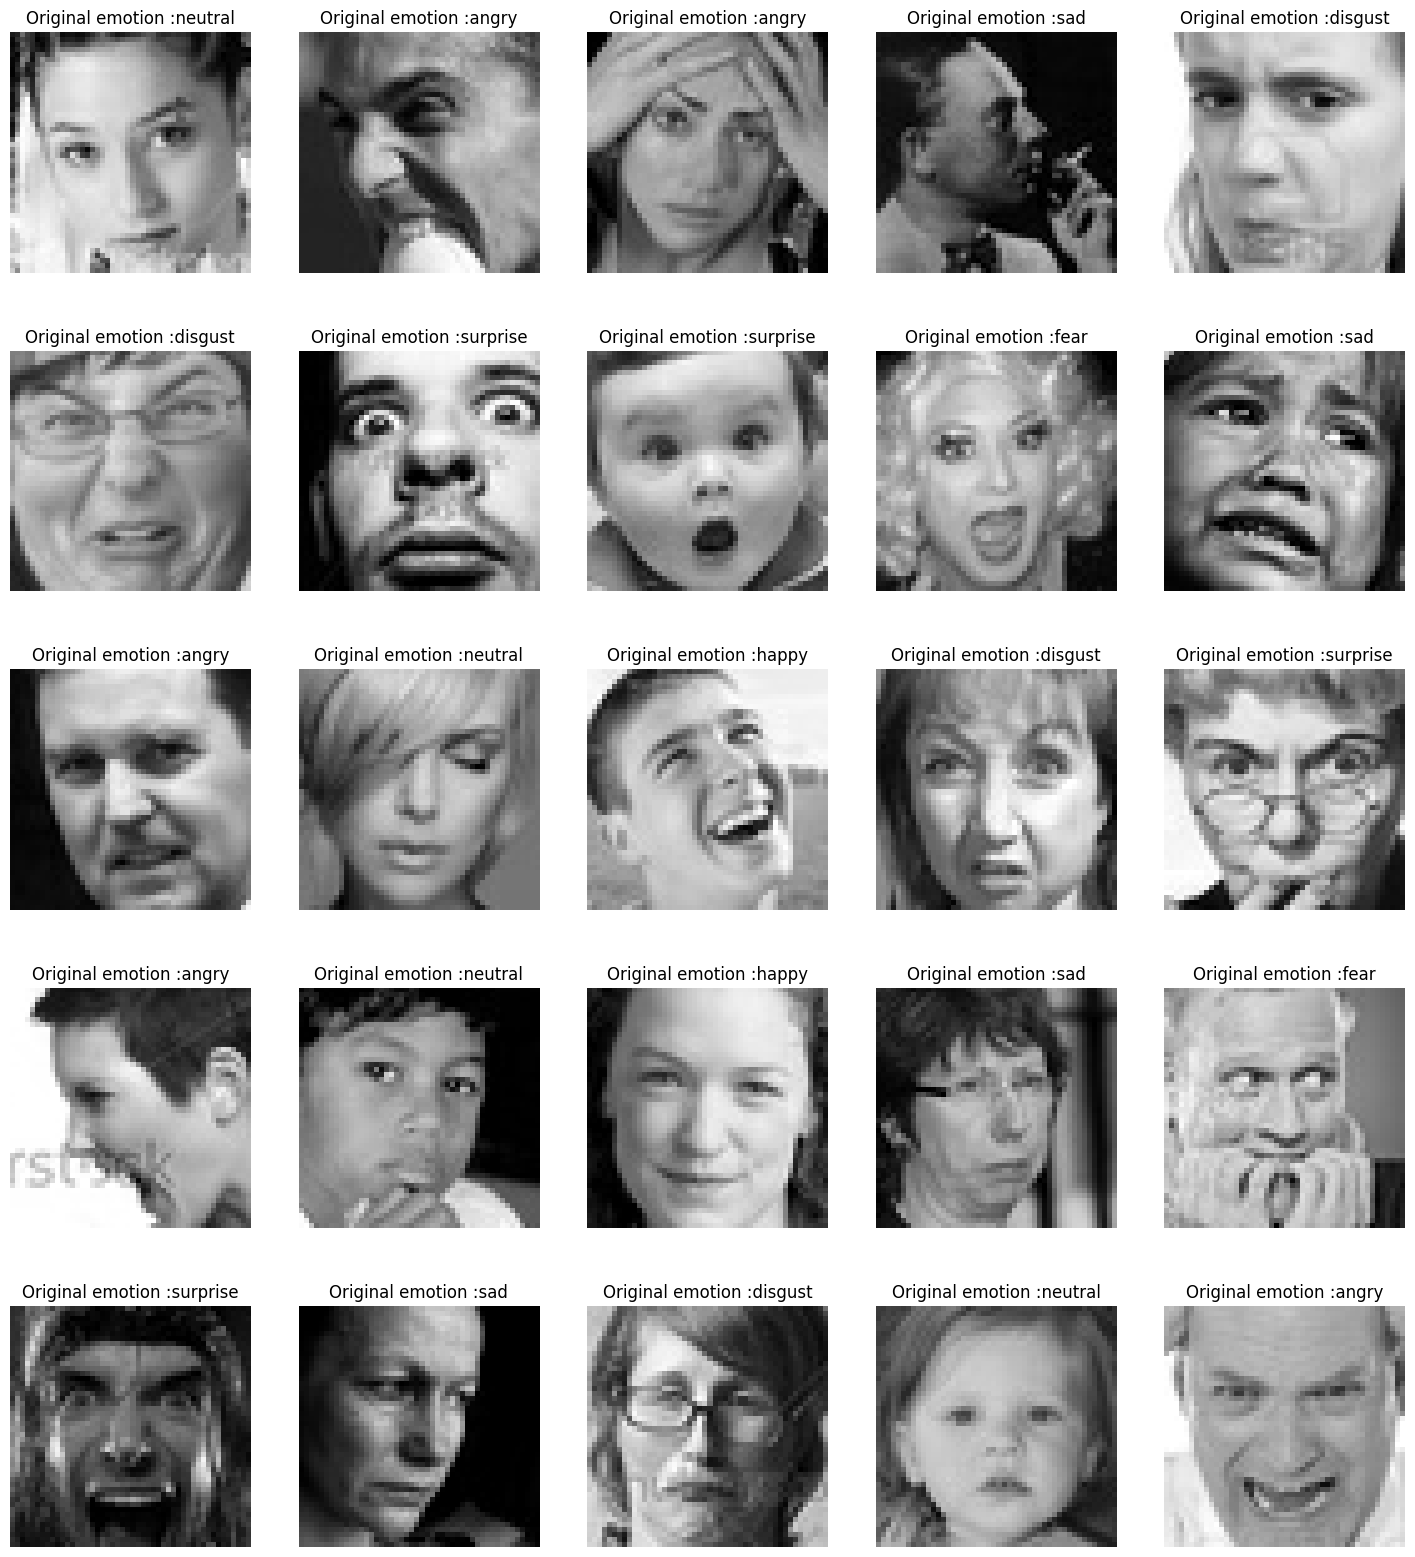

In [141]:
view_random_image(train_path)

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=5,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                #zoom_range=0.2,
                                horizontal_flip=True,
                                # vertical_flip=True,
                                      fill_mode='nearest',
                                   )

test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
train_dir = '/content/fer2013/train'
test_dir =  '/content/fer2013/test'

In [27]:
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=(48,48),
                                               class_mode='categorical',
                                               batch_size=64,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_path,
                                               target_size=(48,48),
                                               class_mode='categorical',
                                               batch_size=64,
                                               )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
cp_path = '/content/drive/MyDrive/cp_faces/cp.ckpt'

model_cp = tf.keras.callbacks.ModelCheckpoint(cp_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      # save_weights_only=True,
                                                      verbose=0)

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape=(48,48,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(3),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense((train_data.num_classes),activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=5,
                    validation_data=test_data)

Epoch 1/5
449/449 [==============================] - 43s 90ms/step - loss: 1.8047 - accuracy: 0.2532 - val_loss: 1.7769 - val_accuracy: 0.2604
Epoch 2/5
449/449 [==============================] - 42s 93ms/step - loss: 1.7722 - accuracy: 0.2643 - val_loss: 1.7378 - val_accuracy: 0.2990
Epoch 3/5
449/449 [==============================] - 41s 91ms/step - loss: 1.7490 - accuracy: 0.2771 - val_loss: 1.7071 - val_accuracy: 0.3093
Epoch 4/5
449/449 [==============================] - 43s 96ms/step - loss: 1.7264 - accuracy: 0.2928 - val_loss: 1.6637 - val_accuracy: 0.3328
Epoch 5/5
449/449 [==============================] - 41s 90ms/step - loss: 1.6956 - accuracy: 0.3152 - val_loss: 1.6159 - val_accuracy: 0.3770


In [93]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape=(48,48,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(3),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense((train_data.num_classes),activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(train_data,
                    epochs=10,
                    validation_data=test_data,
                      callbacks=[model_cp])

Epoch 1/10
449/449 [==============================] - ETA: 0s - loss: 1.8004 - accuracy: 0.2522

449/449 [==============================] - 49s 103ms/step - loss: 1.8004 - accuracy: 0.2522 - val_loss: 1.7554 - val_accuracy: 0.2719
Epoch 2/10
449/449 [==============================] - ETA: 0s - loss: 1.7592 - accuracy: 0.2712

449/449 [==============================] - 46s 102ms/step - loss: 1.7592 - accuracy: 0.2712 - val_loss: 1.7032 - val_accuracy: 0.3204
Epoch 3/10
449/449 [==============================] - ETA: 0s - loss: 1.7361 - accuracy: 0.2904

449/449 [==============================] - 44s 99ms/step - loss: 1.7361 - accuracy: 0.2904 - val_loss: 1.6794 - val_accuracy: 0.3263
Epoch 4/10
449/449 [==============================] - ETA: 0s - loss: 1.6994 - accuracy: 0.3117

449/449 [==============================] - 45s 100ms/step - loss: 1.6994 - accuracy: 0.3117 - val_loss: 1.5908 - val_accuracy: 0.3844
Epoch 5/10
449/449 [==============================] - 44s 97ms/step - loss: 1.6642 - accuracy: 0.3323 - val_loss: 1.5801 - val_accuracy: 0.3835
Epoch 6/10
449/449 [==============================] - ETA: 0s - loss: 1.6248 - accuracy: 0.3550

449/449 [==============================] - 49s 109ms/step - loss: 1.6248 - accuracy: 0.3550 - val_loss: 1.4921 - val_accuracy: 0.4316
Epoch 7/10
449/449 [==============================] - ETA: 0s - loss: 1.5888 - accuracy: 0.3729

449/449 [==============================] - 45s 99ms/step - loss: 1.5888 - accuracy: 0.3729 - val_loss: 1.4450 - val_accuracy: 0.4440
Epoch 8/10
449/449 [==============================] - 44s 97ms/step - loss: 1.5629 - accuracy: 0.3890 - val_loss: 1.4408 - val_accuracy: 0.4423
Epoch 9/10
449/449 [==============================] - ETA: 0s - loss: 1.5377 - accuracy: 0.3982

449/449 [==============================] - 45s 100ms/step - loss: 1.5377 - accuracy: 0.3982 - val_loss: 1.3936 - val_accuracy: 0.4678
Epoch 10/10
449/449 [==============================] - ETA: 0s - loss: 1.5203 - accuracy: 0.4108

449/449 [==============================] - 45s 100ms/step - loss: 1.5203 - accuracy: 0.4108 - val_loss: 1.3822 - val_accuracy: 0.4705


In [94]:
model2.evaluate(test_data)

113/113 [==============================] - 5s 46ms/step - loss: 1.3822 - accuracy: 0.4705


[1.3822225332260132, 0.4704653024673462]

In [ ]:
y_pred_test = np.argmax(model2.predict(test_data),axis=-1)



## Evaluation our Model using `Classification Report` and `Confusion Matrix` and plot CM using `sns.heatmap` method

              precision    recall  f1-score   support

       angry       0.14      0.15      0.14       958
     disgust       0.00      0.00      0.00       111
        fear       0.18      0.04      0.07      1024
       happy       0.23      0.33      0.27      1774
     neutral       0.16      0.18      0.17      1233
         sad       0.18      0.15      0.16      1247
    surprise       0.12      0.15      0.14       831

    accuracy                           0.18      7178
   macro avg       0.15      0.14      0.14      7178
weighted avg       0.18      0.18      0.17      7178





<Axes: >

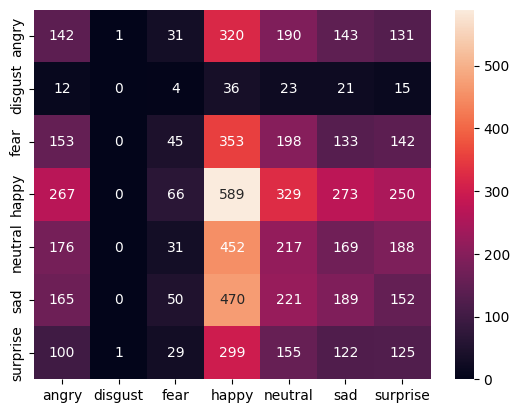

In [146]:
from sklearn.metrics import classification_report , confusion_matrix

cr = classification_report(test_data.classes,y_pred_test,target_names=test_data.class_indices.keys())
print(cr,end='\n\n\n')

cm = confusion_matrix(test_data.classes , y_pred_test)
sns.heatmap(cm,fmt='.00f',
            xticklabels = test_data.class_indices.keys(),
            yticklabels= test_data.class_indices.keys(),annot=True)

In [7]:
def load_img(path):
  img = tf.io.read_file(path)

  img = tf.image.decode_image(img,channels=3)
  img = tf.image.resize(img,size=[48,48])
  img = tf.cast(img,dtype=tf.float32)
  return img/225.

# Use Keras Functional API like `VGG` to imporve our model accuarcy (`Transfer Learning and FineTuning`

In [77]:
base_model_vgg =tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 2s 0us/step


In [78]:
for layer in base_model_vgg.layers[:-4]:
    layer.trainable=False


In [79]:
model_vgg = tf.keras.Sequential([
    base_model_vgg,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32,kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(7,activation='softmax'),
])

model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

hist_vgg = model_vgg.fit(train_data,
                         epochs=10,
                         validation_data=test_data,
                         callbacks=[model_cp])

Epoch 1/10
449/449 [==============================] - 57s 113ms/step - loss: 1.9260 - accuracy: 0.2018 - val_loss: 1.8156 - val_accuracy: 0.2339
Epoch 2/10
449/449 [==============================] - 51s 114ms/step - loss: 1.7957 - accuracy: 0.2425 - val_loss: 1.7669 - val_accuracy: 0.2601
Epoch 3/10
449/449 [==============================] - 52s 115ms/step - loss: 1.7432 - accuracy: 0.2782 - val_loss: 1.7659 - val_accuracy: 0.3004
Epoch 4/10
449/449 [==============================] - 51s 113ms/step - loss: 1.7212 - accuracy: 0.2930 - val_loss: 1.6482 - val_accuracy: 0.3378
Epoch 5/10
449/449 [==============================] - 50s 111ms/step - loss: 1.6957 - accuracy: 0.3083 - val_loss: 1.7607 - val_accuracy: 0.2526
Epoch 6/10
449/449 [==============================] - 53s 118ms/step - loss: 1.6765 - accuracy: 0.3158 - val_loss: 1.6308 - val_accuracy: 0.3459
Epoch 7/10
449/449 [==============================] - 50s 111ms/step - loss: 1.6544 - accuracy: 0.3233 - val_loss: 1.6147 - val_ac

In [84]:
model_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout_8 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_14 (Dense)            (None, 32)                16416     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [85]:
import keras.backend as K
def f1_score(y_true,y_pred): #taken from old keras source code
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    possible_positives=K.sum(K.round(K.clip(y_true,0,1)))
    predicted_positives=K.sum(K.round(K.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+K.epsilon())
    recall=true_positives/(possible_positives+K.epsilon())
    f1_val=2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [86]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

In [ ]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

vgg_history=model_vgg.fit(train_data,validation_data=test_data,epochs=10,
                          )

Epoch 1/10
449/449 [==============================] - 88s 117ms/step - loss: 1.5770 - accuracy: 0.8693 - precision: 0.6874 - recall: 0.1561 - auc: 0.7720 - f1_score: 0.2503 - val_loss: 1.5066 - val_accuracy: 0.8717 - val_precision: 0.6971 - val_recall: 0.1806 - val_auc: 0.7928 - val_f1_score: 0.2862
Epoch 2/10
449/449 [==============================] - 50s 112ms/step - loss: 1.5634 - accuracy: 0.8688 - precision: 0.6681 - recall: 0.1621 - auc: 0.7722 - f1_score: 0.2598 - val_loss: 1.4925 - val_accuracy: 0.8753 - val_precision: 0.7798 - val_recall: 0.1771 - val_auc: 0.7966 - val_f1_score: 0.2859
Epoch 3/10
449/449 [==============================] - 50s 111ms/step - loss: 1.5567 - accuracy: 0.8694 - precision: 0.6747 - recall: 0.1661 - auc: 0.7740 - f1_score: 0.2652 - val_loss: 1.5572 - val_accuracy: 0.8747 - val_precision: 0.7310 - val_recall: 0.1946 - val_auc: 0.7981 - val_f1_score: 0.3066
Epoch 4/10
449/449 [==============================] - 50s 111ms/step - loss: 1.5567 - accuracy: 0

In [89]:
cp_path2 = '/content/drive/MyDrive/cp_faces/cp_vgg.ckpt'

model_cp2 = tf.keras.callbacks.ModelCheckpoint(cp_path2,
                                               monitor = 'val_accuracy',
                                               save_best_only=True,
                                               verbose=0)

In [90]:
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

vgg_history=model_vgg.fit(train_data,validation_data=test_data,epochs=10,
                          callbacks=[model_cp2])

Epoch 1/10
449/449 [==============================] - ETA: 0s - loss: 1.5718 - accuracy: 0.8691 - precision: 0.6905 - recall: 0.1517 - auc: 0.7692 - f1_score: 0.2476

449/449 [==============================] - 65s 133ms/step - loss: 1.5718 - accuracy: 0.8691 - precision: 0.6905 - recall: 0.1517 - auc: 0.7692 - f1_score: 0.2476 - val_loss: 1.5368 - val_accuracy: 0.8690 - val_precision: 0.9030 - val_recall: 0.0933 - val_auc: 0.7850 - val_f1_score: 0.1674
Epoch 2/10
449/449 [==============================] - ETA: 0s - loss: 1.5539 - accuracy: 0.8703 - precision: 0.7052 - recall: 0.1580 - auc: 0.7747 - f1_score: 0.2576

449/449 [==============================] - 57s 127ms/step - loss: 1.5539 - accuracy: 0.8703 - precision: 0.7052 - recall: 0.1580 - auc: 0.7747 - f1_score: 0.2576 - val_loss: 1.4774 - val_accuracy: 0.8771 - val_precision: 0.8077 - val_recall: 0.1838 - val_auc: 0.8039 - val_f1_score: 0.2969
Epoch 3/10
449/449 [==============================] - 50s 111ms/step - loss: 1.5435 - accuracy: 0.8708 - precision: 0.6993 - recall: 0.1678 - auc: 0.7787 - f1_score: 0.2699 - val_loss: 1.4918 - val_accuracy: 0.8762 - val_precision: 0.8415 - val_recall: 0.1643 - val_auc: 0.7972 - val_f1_score: 0.2725
Epoch 4/10
449/449 [==============================] - 53s 117ms/step - loss: 1.5346 - accuracy: 0.8710 - precision: 0.6924 - recall: 0.1747 - auc: 0.7820 - f1_score: 0.2782 - val_loss: 1.4850 - val_accuracy: 0.8736 - val_precision: 0.8618 - val_recall: 0.1372 - val_auc: 0.8026 - val_f1_score: 0.2345
Epoch 5/10
449/449 [==============================] - 53s 119ms/step - loss: 1.5249 - accuracy: 0.8723 - pre

449/449 [==============================] - 60s 134ms/step - loss: 1.5053 - accuracy: 0.8733 - precision: 0.7167 - recall: 0.1873 - auc: 0.7915 - f1_score: 0.2962 - val_loss: 1.4391 - val_accuracy: 0.8790 - val_precision: 0.7843 - val_recall: 0.2112 - val_auc: 0.8117 - val_f1_score: 0.3305
Epoch 7/10
449/449 [==============================] - 54s 119ms/step - loss: 1.5000 - accuracy: 0.8733 - precision: 0.7142 - recall: 0.1884 - auc: 0.7928 - f1_score: 0.2972 - val_loss: 1.4360 - val_accuracy: 0.8788 - val_precision: 0.7725 - val_recall: 0.2152 - val_auc: 0.8139 - val_f1_score: 0.3347
Epoch 8/10
449/449 [==============================] - 53s 118ms/step - loss: 1.5109 - accuracy: 0.8724 - precision: 0.7015 - recall: 0.1860 - auc: 0.7902 - f1_score: 0.2930 - val_loss: 1.4932 - val_accuracy: 0.8742 - val_precision: 0.8462 - val_recall: 0.1456 - val_auc: 0.7987 - val_f1_score: 0.2469
Epoch 9/10
449/449 [==============================] - ETA: 0s - loss: 1.4908 - accuracy: 0.8740 - precision:

449/449 [==============================] - 58s 129ms/step - loss: 1.4908 - accuracy: 0.8740 - precision: 0.7203 - recall: 0.1932 - auc: 0.7960 - f1_score: 0.3036 - val_loss: 1.4370 - val_accuracy: 0.8792 - val_precision: 0.8289 - val_recall: 0.1943 - val_auc: 0.8147 - val_f1_score: 0.3144
Epoch 10/10
449/449 [==============================] - ETA: 0s - loss: 1.4814 - accuracy: 0.8749 - precision: 0.7235 - recall: 0.2013 - auc: 0.7989 - f1_score: 0.3141

449/449 [==============================] - 60s 134ms/step - loss: 1.4814 - accuracy: 0.8749 - precision: 0.7235 - recall: 0.2013 - auc: 0.7989 - f1_score: 0.3141 - val_loss: 1.4361 - val_accuracy: 0.8792 - val_precision: 0.8184 - val_recall: 0.1984 - val_auc: 0.8137 - val_f1_score: 0.3168


In [91]:
model.evaluate(test_data)

113/113 [==============================] - 6s 49ms/step - loss: 1.6159 - accuracy: 0.3770


[1.615875005722046, 0.37698522210121155]

## Load Saved Model from `ModelCheckpoint` callback

In [5]:
load_saved_model = tf.keras.models.load_model('/content/drive/MyDrive/cp_faces/cp.ckpt')


## Visualize Some model prediction

In [124]:
import matplotlib.image as mpimg
RANDOM_EMOTION  = ['angry', 'disgust', 'fear','happy','neutral','sad','surprise']

def view_random_image_and_prediction(model , target_dir, target_class,emo=RANDOM_EMOTION):
  plt.figure(figsize=(18,25))
  for i in range(25):

    ax = plt.subplot(5,5,i+1)


    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    img = tf.io.read_file(target_folder + "/" + random_image[0])
    img = tf.image.decode_image(img,channels=3)
    img = tf.image.resize(img,size=[48,48])
    img = tf.cast(img,tf.float32)
    plt.imshow(np.array(img,np.int32))

    img_prediction = model.predict(tf.expand_dims(img,axis=0))
    img_pred = emo[int(np.argmax(img_prediction,axis=-1))]

    plt.title(f'Original emotion :{target_class} "\n\n " prediction: {img_pred} , accuracy = {img_prediction.max():.2f}')
    plt.axis(False)
  # return img

1/1 [==============================] - 0s 19ms/step


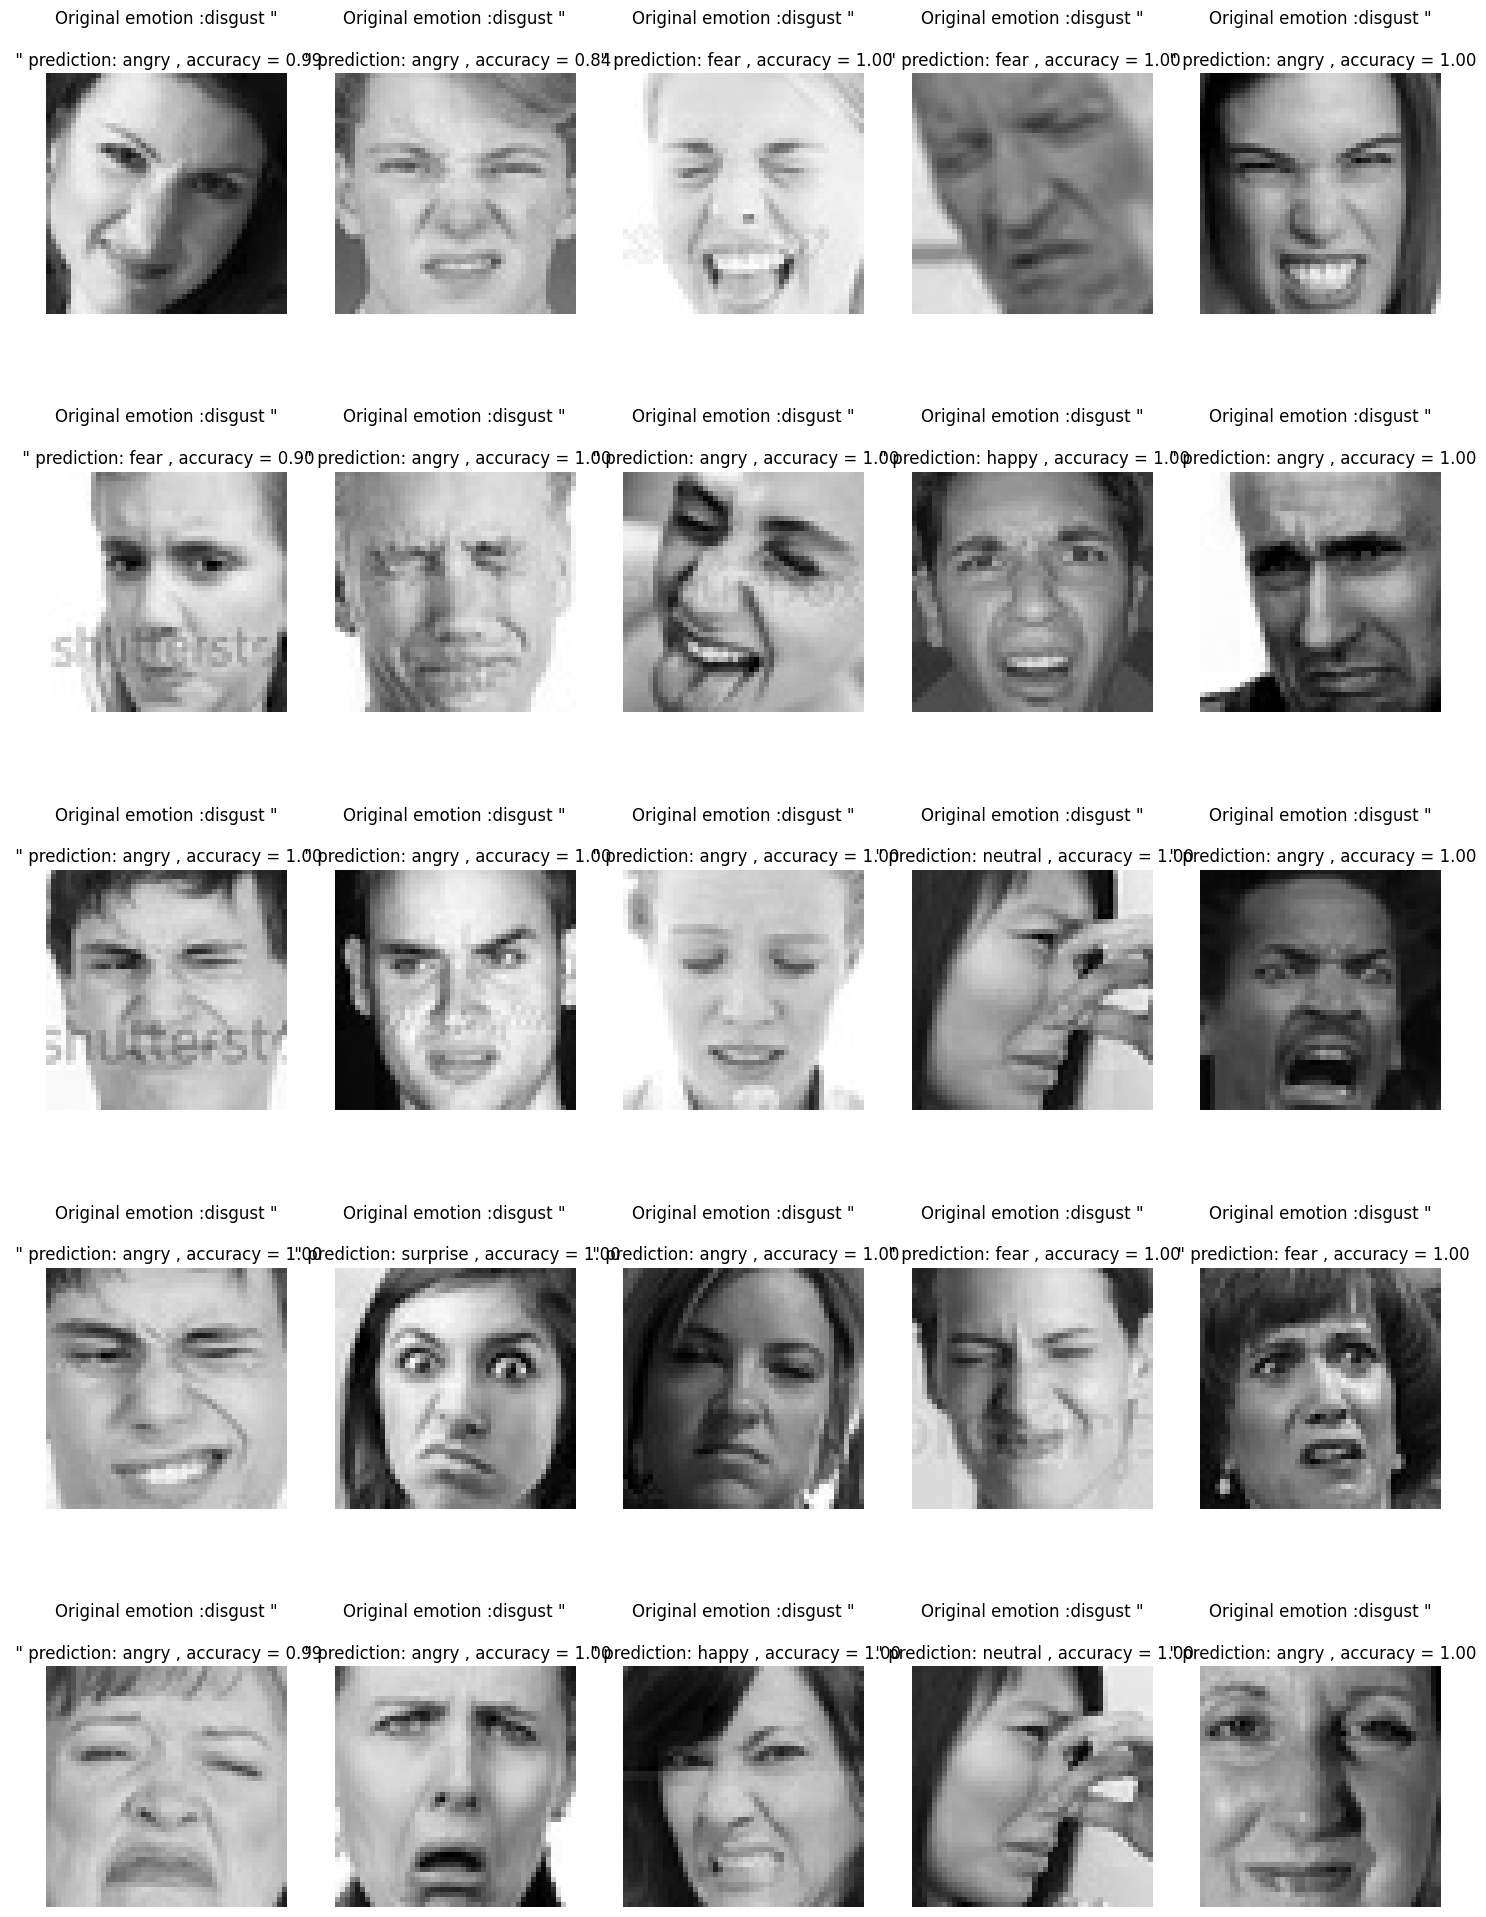

In [125]:
rand_img = view_random_image_and_prediction(model= load_saved_model ,
                                            target_dir=train_path+'/',
                             target_class = random.choice(RANDOM_EMOTION))

## Music Recommendation

1/1 [==============================] - 0s 22ms/step


(int, 'surprise')

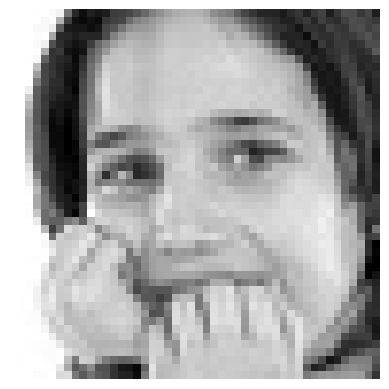

In [162]:
target_folder = train_path +'/'+ random.choice(RANDOM_EMOTION)

random_image = random.sample(os.listdir(target_folder), 1)
img = tf.io.read_file(target_folder + "/" + random_image[0])
img = tf.image.decode_image(img,channels=3)
img = tf.image.resize(img,size=[48,48])
img = tf.cast(img,tf.float32)
plt.imshow(np.array(img,np.int32))

img_prediction = load_saved_model.predict(tf.expand_dims(img,axis=0))
img_pred = int(np.argmax(img_prediction,axis=-1))
emo = RANDOM_EMOTION[img_pred]
plt.axis(False)
type(img_pred) , emo

# Download Spotify Music data to identify the moods that help us to recommend music according to Mood

In [153]:
od.download('https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: drkarimkamal
Your Kaggle Key: ··········


100%|██████████| 56.0k/56.0k [00:00<00:00, 25.4MB/s]

In [156]:
music_df = pd.read_csv('/content/spotify-music-data-to-identify-the-moods/data_moods.csv')
music_df = music_df[['name','artist','mood']]
music_df.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


In [163]:
if(img_pred==0 or img_pred==1 or img_pred==2 ):
    #for angery,disgust,fear
    filter1=music_df['mood']=='Calm'
    f1=music_df.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(img_pred==3 or img_pred==4):
    #for happy, neutral
    filter1=music_df['mood']=='Happy'
    f1=music_df.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(img_pred==5):
       #for Sad
    filter1=music_df['mood']=='Sad'
    f1=music_df.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(img_pred==6):
     #for surprise
    filter1=music_df['mood']=='Energetic'
    f1=music_df.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)

,index,name,artist,mood
0,443,Reinventing Your Exit,Underoath,Energetic
1,294,Kiss You All Over - Single Edit,Isaac Elton,Energetic
2,558,The King (with Dzeko),Dimitri Vangelis & Wyman,Energetic
3,451,Rise (ft. Matluck) - Thomas Gold Remix,Nicky Romero,Energetic
4,638,White Lies,Stacy Crowne,Energetic
